In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv("/content/drive/My Drive/DS203/summer-products-with-rating-and-performance_2020-08.csv")
print("Data types of the variable is the dataset is:")
print(df.dtypes)
print('*'*100)
print("The Shape of the data frame is "+str(df.shape))


Data types of the variable is the dataset is:
title                            object
title_orig                       object
price                           float64
retail_price                      int64
currency_buyer                   object
units_sold                        int64
uses_ad_boosts                    int64
rating                          float64
rating_count                      int64
rating_five_count               float64
rating_four_count               float64
rating_three_count              float64
rating_two_count                float64
rating_one_count                float64
badges_count                      int64
badge_local_product               int64
badge_product_quality             int64
badge_fast_shipping               int64
tags                             object
product_color                    object
product_variation_size_id        object
product_variation_inventory       int64
shipping_option_name             object
shipping_option_price             

In [26]:
for col in df.columns.values:
  list_vals = pd.unique(df[col])
  if len(list_vals) == 1:
    df = df.drop(col,axis = 1)
df = df.drop("product_url",axis = 1)  
df = df.drop("product_picture",axis = 1)
df = df.drop("merchant_profile_picture",axis = 1)
df = df.drop("merchant_has_profile_picture",axis = 1)
df = df.drop("merchant_info_subtitle",axis = 1)
df = df.drop("merchant_title",axis = 1)
df = df.drop("tags",axis=1)

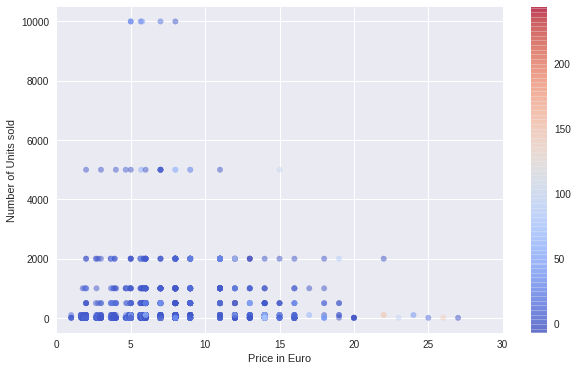

In [27]:
sns.set_context("talk", font_scale=1.1)
plt.style.use('seaborn')
plt.figure(figsize=(10,6))

df['retail_price'] = df['retail_price'].astype(float)

df2 = df.sort_values(by='price',ignore_index=True,ascending=True)
df2['price_difference'] = np.array(df2['retail_price'])-np.array(df2['price'])

df2 = df2[['price_difference','retail_price','price','units_sold','rating']]

plt.scatter(df2['price'],y=0.1*abs(df2['units_sold']),alpha=0.5,c=df2['price_difference'],cmap=plt.cm.coolwarm,s=30)
plt.xlabel('Price in Euro')
plt.ylabel('Number of Units sold')
#removing the one outlier at 50
plt.xlim(0,30)
plt.colorbar()
plt.show()

We can make an observation that as the price gets higher number of units sold reduces which is kind of obvious.Another observation is that as the price increases the price difference also increases, that is costlier goods are sold at a higher discount. The units sold appears to be discrete which is peculiar.


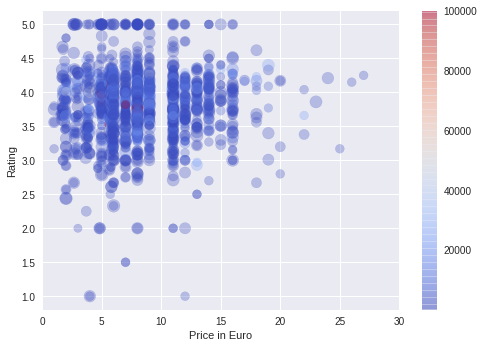

In [28]:
#Lets also plot number of products sold by rating
plt.scatter(df2['price'],y=(df2['rating']),alpha=0.3,c=df2['units_sold'],cmap=plt.cm.coolwarm,s=15*np.log(df['units_sold']+100))
plt.xlabel('Price in Euro')
plt.ylabel('Rating')
#removing the one outlier at 50
plt.xlim(0,30)
plt.colorbar()
plt.show()


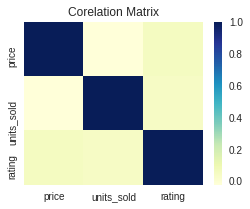

In [29]:
#corelation matrix of price price and rating 
corr = df2[['price','units_sold','rating']].corr()
plt.figure(figsize=(4,3))
sns.heatmap(corr, annot=False,cmap="YlGnBu")
plt.title("Corelation Matrix")
plt.show()

An observation here is that price doesn't influence rating or the units sold

In [30]:
df['units_sold'] = df['units_sold'].astype(float)
df2 = df[['product_color','units_sold']].groupby('product_color',as_index=False).sum()
df2.sort_values(by='units_sold',ascending=False,inplace=True,ignore_index=True)

print(df2.head(10))
print(str('*'*100))
print(df['product_variation_size_id'].value_counts()[:10])


  product_color  units_sold
0         black   1582313.0
1         white   1122227.0
2          grey    436190.0
3        purple    338480.0
4          blue    316238.0
5           red    294300.0
6         green    291543.0
7          pink    258500.0
8        yellow    222212.0
9        orange    192808.0
****************************************************************************************************
S         641
XS        356
M         200
XXS       100
L          49
S.         18
XL         17
XXL        15
XXXS        6
Size S      5
Name: product_variation_size_id, dtype: int64


One key thing that we can observe from the value counts of product variation id is that although there are some values with their id in a format difficult to handle, most id's are in the standard format. Hence we can go ahead with these and ignore the rest

In [31]:
df.loc[df['product_variation_size_id']=='XS.']=df.loc[df['product_variation_size_id']=='XS.']['product_variation_size_id']='XS'
df.loc[df['product_variation_size_id']=='S.']=df.loc[df['product_variation_size_id']=='S.']['product_variation_size_id']='S'

print(print(df['product_variation_size_id'].value_counts()[:10]))

options = ['XXXS','XXS','XS','S','M','L','XL','XXL','4XL']

df3 = df.loc[df['product_variation_size_id'].isin(options)]
#df3['units_sold'] = df3['units_sold'].astype(float)
df3 = df3[df3['units_sold']!='XS']
df3 = df3[df3['units_sold']!='S']
df3['units_sold'] = df3['units_sold'].astype(float)


print("The size of df3 is still " +str(df3.shape[0]))

S         659
XS        361
M         200
XXS       100
L          49
XL         17
XXL        15
XXXS        6
Size S      5
4XL         5
Name: product_variation_size_id, dtype: int64
None
The size of df3 is still 1389


In [32]:

df3 = df3[['product_variation_size_id','units_sold']]

df3 = df3.groupby('product_variation_size_id',as_index=False).sum()
#df3 = df3[['product_variation_size_id','units_sold']]

sorter = options
sorter[8] = 'XXXL'
sorterIndex = dict(zip(sorter, range(len(sorter))))

df3['Tm_Rank'] = df3['product_variation_size_id'].map(sorterIndex)
df3.sort_values(by='Tm_Rank',ignore_index=True,inplace=True)
df3.drop(columns='Tm_Rank',inplace=True)


[]

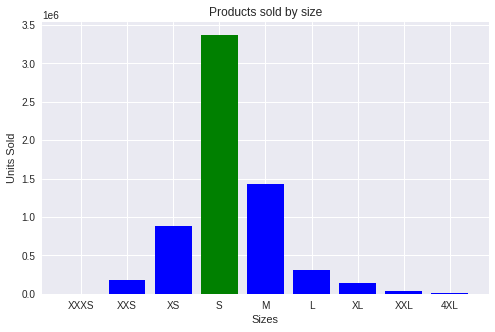

In [33]:
#Now we can plot the histogram for this data
plt.style.use('seaborn')
fig,ax = plt.subplots(figsize=(8,5))
color = ['blue']*10
color[3] = 'green'
ax.bar(x=df3['product_variation_size_id'],height=df3['units_sold'],color=color)
ax.set_title('Products sold by size')
ax.set_xlabel('Sizes')
ax.set_ylabel('Units Sold')
plt.plot()

Lets move on to color now

In [34]:
display(df2.iloc[:10])

,product_color,units_sold
0,black,1582313.0
1,white,1122227.0
2,grey,436190.0
3,purple,338480.0
4,blue,316238.0
5,red,294300.0
6,green,291543.0
7,pink,258500.0
8,yellow,222212.0
9,orange,192808.0


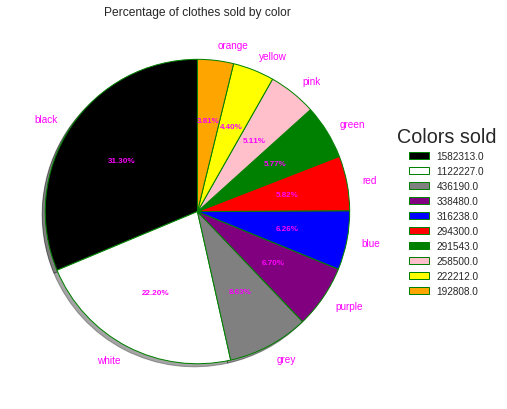

In [35]:

labels = df2['product_color'][:10]
sections = df2['units_sold'][:10]

colors = df2.product_color
wp = { 'linewidth' : 1, 'edgecolor' : "green" } 
  
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.2f}%\n({:d} g)".format(pct, absolute) 
  
#Parts taken from https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/
# Creating plot 
fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotexts = ax.pie(sections,  labels = labels, autopct='%1.2f%%', shadow = True, colors = colors, startangle = 90, wedgeprops = wp, textprops = dict(color ="magenta")) 

# Adding legend 
ax.legend(wedges, sections, 
          title ="Colors sold", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 
  
plt.setp(autotexts, size = 8, weight ="bold") 
ax.set_title("Percentage of clothes sold by color") 
  
# show plot 
plt.show() 

Similar to the previous question we have uses add boosts which takes only two values. Hence it is a suitable candidate to plot as a bi-histogram

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


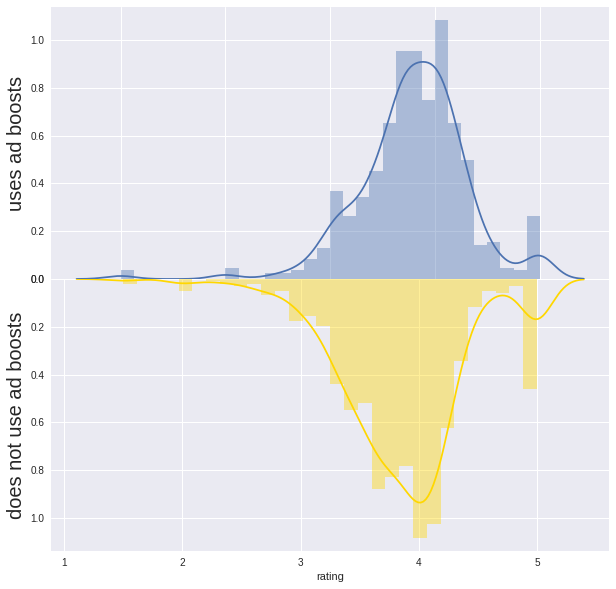

In [36]:
#uses ad boosts 1 and 0 at top and bottom and histogram of units sold 

df1 = df[['uses_ad_boosts','units_sold','rating']].loc[df['uses_ad_boosts']==1]
df0 = df[['uses_ad_boosts','units_sold','rating']].loc[df['uses_ad_boosts']==0]


fig,ax =plt.subplots(2,1,figsize=(10,10))

sns.distplot(a=df1['rating'],hist=True,ax=ax[0])
sns.distplot(a=df0['rating'],hist=True,ax=ax[1],color='gold')
ax[1].invert_yaxis()
ax[0].set_ylabel("uses ad boosts", size = 20)
ax[1].set_ylabel("does not use ad boosts", size = 20)
ax[0].set_xlabel("rating",size = 20)

plt.subplots_adjust(hspace=0)
plt.show()

We infer that using or not using ad boosts doesn't play a role in the user liking a particular product. 

+----+-------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------+------------------+
|    | title_orig                                                                                                                                                        | merchant_name              | origin_country   |
|----+-------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------+------------------|
|  0 | Women Off Shoulder Floral Print Boho Dress Women Beach Summer Dresses Ladies Strapless Long Maxi Dress Vestidos Female                                            | tutishop                   | AT               |
|  1 | 2019 Summer Women Newest Transparent Sheer Thin Mesh Vintage Cupid Angel Printed Short Sleeve T Shirt High Collar Cro

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


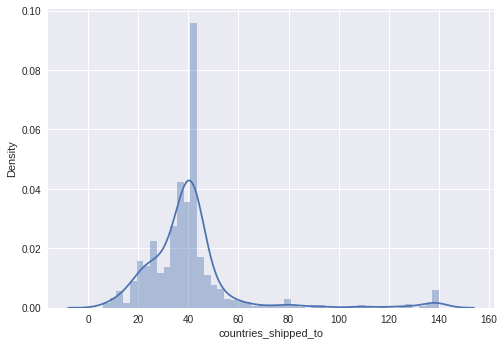

In [37]:
#Lets find the merchants with highest rating
from tabulate import tabulate

dfk = df[['merchant_name','merchant_rating','units_sold','countries_shipped_to','price','title_orig','origin_country']]

#For some reason the rating column also has S and XS as values in it
dfk = dfk.loc[dfk['merchant_rating']!='S']
dfk = dfk.loc[dfk['merchant_rating']!='XS']

dfk['merchant_rating'] = dfk['merchant_rating'].astype(float)
dfk = dfk.sort_values(by='merchant_rating',ascending=False,ignore_index=True)

#Hence, the top 10 merchants and the product sold by them are
print(tabulate(dfk[['title_orig','merchant_name','origin_country']].head(10), headers='keys', tablefmt='psql'))

#clearly high rating doesn't necessarily imply better product as perhaps only a few units were sold and methods were employed to manipulate the rating
#Hence, lets define a column that has the product of units sold and rating normalised

dfk['excel_param'] = dfk['units_sold']*dfk['merchant_rating']/100
dfk.sort_values(by='excel_param',ascending=False,inplace=True,ignore_index=True)
#pd.set_option('display.max_columns', None)
#print(dfk.head(10))
#pd.reset_option('display.max_columns')

#Let's see the relation of the top merchants with the number of countries they ship to

sns.distplot(dfk['countries_shipped_to'])
plt.show()

9 of the top 10 products are of Chinese origin and the top product is of Austria. Most products are shipped to nearly 45 countries 